# Tinder Millennial Match Rate

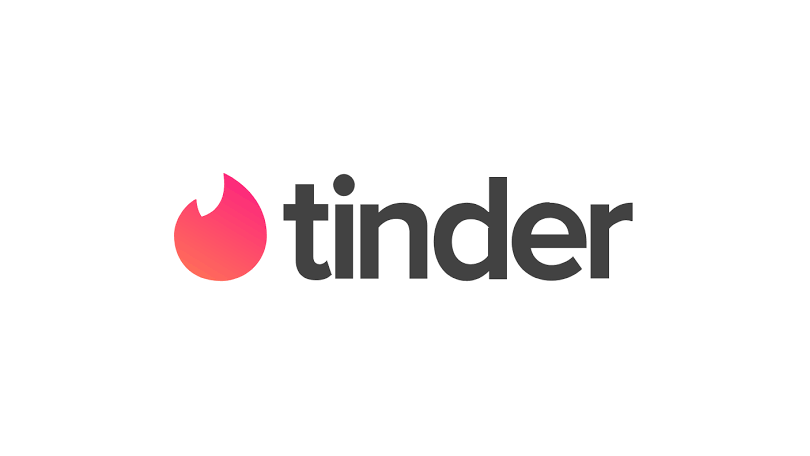

Tiner is an online dating app founded in 2012 and one of the most popular apps in the world. It is serivced in almost 200 countries with more than 6 million paying subscribers.

Tinder is know for gamifiying social interactions associated with dating. It lets users anonymously swipe 'left' or 'right' on other user profiles (which includes short bio and photos) to indicate interest, where left swipe mean dislike and right swipe mean like. If two users both swipe 'right' on each other, the app connects two users via a common chat.


# About the Dataset:

Note from the kaggle page: this is a relaxing mini dataset which explains the match rate of individuals from different universities and whether the app has helped the person to find relationship.

## Column Description:
* ID : User id
* Segment type : Medium of Usage
* Segment Description: Name of Universities
* Answer: Do you use tinder ?
* Count: Number of Matches
* Percentage: % of matches
* It became a relationship- Success of relationship

# Outline

* Acquire dataset
* First glance at data
* Data manipulation/cleaning
* Variable exploration
* Statistical tests

# Acquire dataset

In [ ]:
# Import necessary library
import pandas as pd # data manipulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data avisualization
from scipy.stats import ttest_ind # ttest to compare sample means

%matplotlib inline

In [ ]:
# read .csv file
path = '../input/tinder-millennial-match-rate/Tinder Millennial Match Rate Dataset.csv'
df = pd.read_csv('../input/tinder-millennial-match-rate/Tinder Millennial Match Rate Dataset.csv')

# First glance at data

In [ ]:
# print first 5 rows
df.head()

In [ ]:
# print data types of columns
df.info()

Takeaway:
* It became a relationship would be most useful if it were to be converted into a boolean column

In [ ]:
# print summary statistics
df.describe()

Takeaway:
* There are no missing values, but not all values may be correctly labeled (should be yes/no, but may have other responses)
* 75 percentile of 'count' is 4, while the mean is 22. This indicates a skew in distribution of matches


# Data manipulation / Cleaning

In [ ]:
# Investigate unique values in categorical columns
cat_col = ['Segment Type', 'Segment Description', 'Answer', 'It became a Relationship']
for col in cat_col:
    print('Unique values in "{}" column count: {}'.format(col, df[col].nunique()))
    print(df[col].unique())
    print('-'*30)

Takeaway:
* Segment type indicates the medium of usage, and Tinder has a mobile-based, web-based app as well as a separate feature called 'Tinder U,' geared towards connecting students to students. I am unsure of what 'Gender' value represents.
* There are 151 segment description values, which indicate the college which the response came from. Because there are <500 rows in this small dataset, it would not be feasible to conduct robust analysis on individual university samples.
* Answer column indicates whether the respondent is using Tinder as of now. We can remove 'I don't use Tinder' answers to analyze individuals who actually uses/have used tinder.

In [ ]:
# Convert 'It became a relationship' column into boolean
dict = {'Yes':1, 'No':0} # create a dictionary to map new values
df['It became a Relationship'] = df['It became a Relationship'].map(dict) # apply mapping of values
df['It became a Relationship'] = df['It became a Relationship'].astype(bool) # change data type

In [ ]:
# 'Segement type' unique value counts
df['Segment Type'].value_counts()

In [ ]:
# 'Segment Description' unique value counts
df['Segment Description'].value_counts(ascending=True)

Takeaway:
* All responses only had 3 counts, which is not big enough of a sample for me to analyze

In [ ]:
# 'Answer' Column unique value counts
df['Answer'].value_counts()

In [ ]:
# Mean and median by answer groups
df.groupby('Answer')[['Count', 'Percentage']].agg(['mean','median'])

In [ ]:
# 'Success' indiciator
df['It became a Relationship'].value_counts()

Section Takeaway:
* There seem to be no immediate need to clean up or manipuluate existing data.

# Variable exploration

In [ ]:
# function to plot ecdf, which will help understand distribution of variables
def plot_ecdf(data, col, log_scale=False, plot_norm=False):  
    x = np.sort(data[col])
    x_norm = np.sort(np.random.normal(data[col].mean(), data[col].std(), len(data[col])))
    y = np.sort(np.arange(1, len(data[col])+1)/(len(data[col] + 1)))

    sns.set_style('darkgrid')
    plt.figure(figsize=(14,6))
    sns.scatterplot(x=x, y=y, label=col, alpha = 0.5)
    plt.title('ECDF of {}'.format(col))
    plt.xlabel(col)
    
    if plot_norm==True:
        sns.scatterplot(x=x_norm, y=y, label='Normal distribution', alpha = 0.5)
    
    if log_scale==True:
        plt.xscale('log')

In [ ]:
# examine 'Count' column:
plot_ecdf(df,'Count', False, False)
plt.xlim(-10,110)

Takeaway:
* Distribution of match count is concentrated around 0 and 1
* More than 50% of people have zero matches, and 90 percent of the people have less than 10 matches


In [ ]:
# examine 'Percentage' column:
plot_ecdf(df,'Percentage', False, False)

Takeaway:
* Concentration of value in 0%, 50%, 75% and 100%
    * This leads me to suspect that the data collection is not directly from tinder itself, but from some kind of a survey, where intuitive answers like 50% and 100% are likely be the result
    * Or, this may have been from the result of large proportion of samples coming from those with very low usage. 
    * Unfortunately, the data collection process is not documnted enough for me to deduce on why this phenomenom is observed. 

In [ ]:
# 'It became a Relationship'
df.value_counts('It became a Relationship')

In [ ]:
# Calcualate mean and median number of match percentage and match count 
df.loc[:, df.columns != 'ID'].groupby('Answer')[['Count', 'Percentage']].agg(['mean', 'median'])

Takeaway:
* Interestingly, respondents who have answered with 'no' (on whether the respondent sitll use tinder) had hte overall highest mean and median for matches.
* Unfortunately, it is unclear the distinction between the answer 'I don't use tinder' and 'No' due to lack of documentation, and no further analysis can be done.
    * If 'I don't use tinder' answer meant that the respondent has never used tinder, both the mean and percentage value should be zero

In [ ]:
# Calcualate mean and median number of match percentage and count 
df.loc[:, df.columns != 'ID'].groupby('It became a Relationship').agg(['mean', 'median'])

In [ ]:
# Boxplot of match count 
plt.figure(figsize=(14,6))
sns.boxplot(x=df['Count'], y=df['It became a Relationship'].astype('category'))
plt.xscale('log')
plt.title('Boxplot of match counts')

In [ ]:
# Boxplot of match Percentage 
plt.figure(figsize=(14,6))
sns.boxplot(x=df['Percentage'], y=df['It became a Relationship'].astype('category'))
plt.title('Boxplot of percentage counts')

Takeaway:
* Those who answered 'yes' to the question of tinder leading to a relationship had both the higher count and percentage for Count and Percentage.

# Statistical Test 

**Question: In average, do people end up in relationship via Tinder have greater success rate in matching than those who do not?**

I will be testing this by performing a null hypothesis test using boostrapped samples method. What does this mean?

**Null hypothesis** is an idea that there is no relationship (ex. those who end up in relationship had greater sucess rate) in our population and the differnce in data is a result of sampling error. 

**Null hypothesis test** in this case would assess the likelihood of observed difference of 'percentage' means in our original sample and reject the null hypothesis if certain statistical threshold is met, which often times is 95% confidence level.

**Boostrapping** here refers to the fact that I will be resampling from the existing dataset to create additional samples. In this case, I will be using a permutated sample of 'Percentage' values and see if difference in mean between permutated samples exceed the difference of means in the original sample.  

In [ ]:
# Function to calcaulte difference of a function (ex. mean)
def diff_func(data_1, data_2, func=np.mean):
    difference = func(data_1) - func(data_2)
    return difference

In [ ]:
# Function to grab column value to compare for those found relationship in tinder versus not 
def initial_sample(df=df, col_to_compare='Percentage'):
    rel_yes = df[df['It became a Relationship']][col_to_compare]
    rel_no = df[df['It became a Relationship']!=True][col_to_compare]
    return rel_yes, rel_no

In [ ]:
# Create bootstrapped samples using permutation
def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    permuted_data1 = permuted_data[:len(data1)]
    permuted_data2 = permuted_data[len(data1):]
    
    return permuted_data1, permuted_data2

In [ ]:
# Conduct null hypothesis test with bootstrapped samples
def bootstrap_testing(df, col_to_compare, func, size=1):
    data1, data2 = initial_sample(df, col_to_compare)
    difference = diff_func(data1, data2, func)
    
    sample_stat = [] # initialize a list to store bootstrapped sample statistics
    
    for i in range(size):
        permuted_data1, permuted_data2 = permutation_sample(data1, data2)
        permuted_diff = diff_func(permuted_data1, permuted_data2, func)
        sample_stat.append(permuted_diff)
    
    sample_stat = np.array(sample_stat)
    
    plt.figure(figsize=(14,8))
    ax = sns.histplot(sample_stat)
    ax.axvline(difference, linestyle='--', color='red')
    plt.title('Distribution of bootstraped sample stat versus original sample stat (dashed)')
    
    pval = np.sum(difference <= sample_stat)/len(sample_stat)
    print('Test result : p-value of {}'.format(pval))
    return pval

In [ ]:
# Perform the test with 10000 iterations on difference in mean of 'percentage' for those who found relationship in tinder versus those who did not 
np.random.seed(5)
bootstrap_testing(df=df, col_to_compare='Percentage', func=np.mean, size=10000)

Takeaway:
* The test result shows that the chances of simulated difference in mean being greater or equal to the original difference in original mean was around 4.9%, which corresponds to the P-value of 0.049
* P-value under 0.05 is considered is considered significant enough in most statistical test and therefore I will reject the null hypothesis that there is no relationship between match percentage and finding a relationship in tinder

However...
* We saw earlier that there were people with no matches or had 100% match rate, which suggest low usage
* Would the result be different if we exclue them?

In [ ]:
# Perform the test with 10000 iterations on difference in mean of 'percentage' for those who found relationship in tinder versus those who did not 
# This time subset for those used tinder more frequently
frequent_user = df[(df['Count']>0)&(df['Percentage']<1)]

np.random.seed(5)
bootstrap_testing(df=frequent_user, col_to_compare='Percentage', func=np.mean, size=10000)

Takeaway:

* The test result shows that the chances of simulated difference in mean being greater or equal to the original difference in original mean was around 6.4%, which corresponds to the P-value of 0.0638
* P-value under 0.1, while less significant than 0.05, is considered significant enough in many cases. Therefore, I will conclude that people end up in relationship via Tinder have greater success rate even among more frequent users.

**Follow-up question**

We tested for the percentages earlier. How about the number of matches? Do people end up in relationship via Tinder had more matches in average than those who do not?

In [ ]:
# Perform the test with 10000 iterations on difference in mean of tinder match counts for those who found relationship in tinder versus those who did not 
np.random.seed(5)
bootstrap_testing(df=df, col_to_compare='Count', func=np.mean, size=10000)

In [ ]:
# Perform the test with 10000 iterations on difference in mean of tinder match counts for those who found relationship in tinder versus those who did not 
# Subset only for frequent users

np.random.seed(5)
bootstrap_testing(df=frequent_user, col_to_compare='Count', func=np.mean, size=10000)

Takeaway:

* While p-value of 0.23 and 0.16 makes me want to lean towards reject the null hypothesis, it is not quite significant enough for me to do so

**Conclusion**:

As noted from the introduction, this is a very light dataset containing only around 500 rows and 7 attributes, including an identifier.

Small conclusion we arrived on earlier is that people end up in relationship via Tinder have greater success rate than others.

Analysis similar to one above can help us identify additional insights to segment users and assess their 'matching' performance augmented with robust data (ex. activity like number of swipes, demographics like age and gender, and purchasing pattern including subscription purchase, etc.) 

Few potential projects with robust dataset may include:
* Classification on who makes the purchase decision
* Identify the threshold in which a person leaves the app (ex. do people leave tinder after not getting matches after n days?)